# We Discover Test

### Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.append('..')

### Read data


In [43]:
data = pd.read_csv('../Data/Analyst_test_data.csv', sep=';')
data = data.iloc[:3040]
data.tail(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
3037,2020-10-13,100076,200076,300076,"[""mvt_id:91,var_id:type_2""]","£17,79",1977,13,"1,82","0,34","0,09"
3038,2020-10-14,100076,200076,300076,"[""mvt_id:91,var_id:type_2""]","£18,71",1643,16,"1,31","0,69","0,25"
3039,2020-10-15,100076,200076,300076,"[""mvt_id:91,var_id:type_2""]","£23,76",2078,16,"1,00","0,53","0,15"


## Inspect variables

### 1. Date

In [44]:
data.date.value_counts().sort_index().head(3)

2020-09-06    76
2020-09-07    76
2020-09-08    76
Name: date, dtype: int64

In [45]:
pd.to_datetime(data.date).head(3)

0   2020-09-06
1   2020-09-07
2   2020-09-08
Name: date, dtype: datetime64[ns]

### 2. Campaign_id

In [46]:
data.campaign_id.value_counts().head(3)

100002    40
100021    40
100035    40
Name: campaign_id, dtype: int64

In [47]:
data.campaign_id.value_counts().sort_index().head(3)

100001    40
100002    40
100003    40
Name: campaign_id, dtype: int64

### 3. Ad_group_id

In [48]:
data.ad_group_id.value_counts().head(3)

200001    40
200022    40
200036    40
Name: ad_group_id, dtype: int64

In [49]:
data.campaign_id.value_counts().sort_index().head(3)

100001    40
100002    40
100003    40
Name: campaign_id, dtype: int64

### 4. Ad_id

In [50]:
data.ad_id.value_counts().head(3)

300002    40
300021    40
300035    40
Name: ad_id, dtype: int64

In [51]:
data.ad_id.value_counts().sort_index().head(3)

300001    40
300002    40
300003    40
Name: ad_id, dtype: int64

### 5. Labels


In [52]:
data.labels.value_counts()

["mvt_id:91,var_id:type_1"]    1800
["mvt_id:91,var_id:type_2"]    1240
Name: labels, dtype: int64

### 6. Cost


In [53]:
data.cost.value_counts().head(3)

£24,81    5
£18,97    5
£26,67    5
Name: cost, dtype: int64

In [54]:
np.dtype(data.cost)

dtype('O')

In [55]:
data.cost.replace({'£':''}, inplace=True)

In [56]:
data.cost.replace(to_replace=',', value='.', inplace=True)

In [57]:
data.cost = data.cost.str.replace('£', '')

In [58]:
data.cost = data.cost.str.replace(',', '.')

In [59]:
data.cost = data.cost.astype(float)
data.head()

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
0,2020-09-06,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",20.68,1821,12,"2,68","0,98","0,18"
1,2020-09-07,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",17.41,2297,10,"1,72","0,46","0,20"
2,2020-09-08,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",13.02,1551,7,"1,12","0,50","0,15"
3,2020-09-09,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",17.07,1398,10,"1,33","0,75","0,18"
4,2020-09-10,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",23.90,2754,14,"2,39","0,97","0,16"


In [60]:
data.cost.mean()

25.117315789473682

In [61]:
data.dtypes

date              object
campaign_id        int64
ad_group_id        int64
ad_id              int64
labels            object
cost             float64
impressions        int64
clicks             int64
registrations     object
enquiries         object
purchases         object
dtype: object

In [62]:
cols = ['registrations', 'enquiries', 'purchases']
for col in cols:
    data[col]= data[col].str.replace(',', '.')
    data[col]= data[col].astype(float)

In [63]:
data.registrations.describe()

count    3040.000000
mean        1.942438
std         0.975527
min         0.470000
25%         1.220000
50%         1.730000
75%         2.440000
max         5.910000
Name: registrations, dtype: float64

In [64]:
data.enquiries.describe()

count    3040.000000
mean        0.945036
std         0.470610
min         0.140000
25%         0.580000
50%         0.860000
75%         1.210000
max         2.830000
Name: enquiries, dtype: float64

In [65]:
data.purchases.describe()

count    3040.00000
mean        0.21028
std         0.09578
min         0.04000
25%         0.14000
50%         0.19000
75%         0.26000
max         0.61000
Name: purchases, dtype: float64

## Dividing dataset

In [66]:
campaign_1 = data[data['labels']=='["mvt_id:91,var_id:type_1"]']
campaign_1.head()

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
0,2020-09-06,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",20.68,1821,12,2.68,0.98,0.18
1,2020-09-07,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",17.41,2297,10,1.72,0.46,0.20
2,2020-09-08,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",13.02,1551,7,1.12,0.50,0.15
3,2020-09-09,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",17.07,1398,10,1.33,0.75,0.18
4,2020-09-10,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",23.90,2754,14,2.39,0.97,0.16


In [67]:
campaign_2 = data[data['labels']=='["mvt_id:91,var_id:type_2"]']
campaign_2.head()

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
1800,2020-09-06,100046,200046,300046,"[""mvt_id:91,var_id:type_2""]",33.72,2313,27,2.87,1.92,0.44
1801,2020-09-07,100046,200046,300046,"[""mvt_id:91,var_id:type_2""]",26.17,4543,23,1.91,1.19,0.29
1802,2020-09-08,100046,200046,300046,"[""mvt_id:91,var_id:type_2""]",28.72,3134,19,2.96,1.37,0.30
1803,2020-09-09,100046,200046,300046,"[""mvt_id:91,var_id:type_2""]",40.59,4188,26,3.95,1.89,0.35
1804,2020-09-10,100046,200046,300046,"[""mvt_id:91,var_id:type_2""]",40.70,4748,31,4.32,1.16,0.37


## CTR (click through rate)

In [88]:
ctr_1 = campaign_1.clicks.sum()/campaign_1.impressions.sum()
ctr_1

0.005640119469018169

In [89]:
ctr_2 = campaign_2.clicks.sum()/campaign_2.impressions.sum()
ctr_2

0.005835239850427001

In [90]:
starting_ctr_dif = ctr_2-ctr_1
starting_ctr_dif

0.00019512038140883248

#### Hypothesis:


H0: CTR of campaign_1 == CTR of campaign_2

H1: CTR of campaign_1 != CTR of campaign_2

In [91]:
campaign_1.shape[0]

1800

In [92]:
campaign_2.shape[0]

1240

#### Experiment

In [93]:
def experiment():
    s1 = data.sample(1800, replace=True)
    s2 = data.sample(1240, replace=True)
    s1_ctr = s1.clicks.sum()/s1.impressions.sum()    
    s2_ctr = s2.clicks.sum()/s2.impressions.sum()
    diff = s2_ctr-s1_ctr
    return diff

In [94]:
differences = []
for n in list(range(1,1001)):
    experiment_diff = experiment()
    differences.append(experiment_diff)
differences[:3]

[-4.335679388608668e-05, 5.231275085343379e-05, -3.6840403074745245e-05]

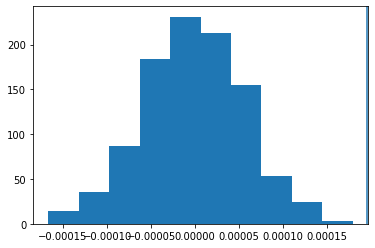

In [95]:
plt.hist(differences)
plt.axvline(starting_ctr_dif)

In [96]:
extreme = []
for dif in differences:
    if dif >= starting_ctr_dif:
        extreme.append(dif)
p_value = len(extreme)/len(ctr_diffs)
p_value

0.0

## Conclusion
We can reject our null hypothesis. There's is almost no chance of this differennce in CTR being due to randomness.

Campaign 2 has a significantly better CTR (0.02% better)

In [97]:
# Confidence intervals?